## Exploring the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data= pd.read_csv(r"C:\Users\KIIT\Downloads\synopsis.csv")
missing=data['synopsis'].isnull().sum()
print("the missing values are:", missing)

the missing values are: 288


## [1] Renaming the unnamed column as sl no and reindexing the dataset

In [3]:
data.rename(columns={data.columns[0]:'slno'}, inplace=True)
data.reset_index( drop=True, inplace=True)
data.index +=1
data['slno']=data.index

data.head()
    

,slno,title,author,release year,synopsis,book length,rating,number of ratings
1,1,Pride and Prejudice (Paperback),Jane Austen,1813,"Elizabeth Bennet, an independent and witty you...",NaN,4.28,3732237
2,2,The Fault in Our Stars (Hardcover),John Green,2012,"Hazel Grace Lancaster, a cancer patient, finds...",NaN,4.16,4501032
3,3,"Red, White & Royal Blue (Paperback)",Casey McQuiston,2019,"When Alex Claremont-Diaz, the First Son of the...",NaN,4.16,607767
4,4,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,2005,About three things I was absolutely positive.F...,498.0,3.63,5901197
5,5,The Hating Game (Paperback),Sally Thorne,2016,Nemesis (n.) 1) An opponent or rival whom a pe...,365.0,3.98,537504


## [2] Dropping the book length and release year column

In [4]:
data = data.drop(columns=['release year','book length'], errors='ignore')
data.head()

,slno,title,author,synopsis,rating,number of ratings
1,1,Pride and Prejudice (Paperback),Jane Austen,"Elizabeth Bennet, an independent and witty you...",4.28,3732237
2,2,The Fault in Our Stars (Hardcover),John Green,"Hazel Grace Lancaster, a cancer patient, finds...",4.16,4501032
3,3,"Red, White & Royal Blue (Paperback)",Casey McQuiston,"When Alex Claremont-Diaz, the First Son of the...",4.16,607767
4,4,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,About three things I was absolutely positive.F...,3.63,5901197
5,5,The Hating Game (Paperback),Sally Thorne,Nemesis (n.) 1) An opponent or rival whom a pe...,3.98,537504


## [3] Changing the synopsis of books that have null values to "its a surprise!"

In [5]:
data['synopsis'].isnull().sum()

288

In [6]:
data['synopsis']= data['synopsis'].fillna("It's a surprise!")

In [7]:
data

,slno,title,author,synopsis,rating,number of ratings
1,1,Pride and Prejudice (Paperback),Jane Austen,"Elizabeth Bennet, an independent and witty you...",4.28,3732237
2,2,The Fault in Our Stars (Hardcover),John Green,"Hazel Grace Lancaster, a cancer patient, finds...",4.16,4501032
3,3,"Red, White & Royal Blue (Paperback)",Casey McQuiston,"When Alex Claremont-Diaz, the First Son of the...",4.16,607767
4,4,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,About three things I was absolutely positive.F...,3.63,5901197
5,5,The Hating Game (Paperback),Sally Thorne,Nemesis (n.) 1) An opponent or rival whom a pe...,3.98,537504
...,...,...,...,...,...,...
1243,1243,"Bombshell (Hell's Belles, #1)",Sarah MacLean,New York Times bestselling author Sarah MacLea...,3.82,8823
1244,1244,"Silver Borne (Mercy Thompson, #5)",Patricia Briggs,It's a surprise!,4.38,102351
1245,1245,"Happily Ever After (The Selection, #0.4, 0.5, ...",Kiera Cass,It's a surprise!,4.09,56952
1246,1246,"Dead Reckoning (Sookie Stackhouse, #11)",Charlaine Harris,It's a surprise!,3.80,122829


## [4] Exploring text data

a. synopses length

In [8]:
data['synopsis_length'] = data['synopsis'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

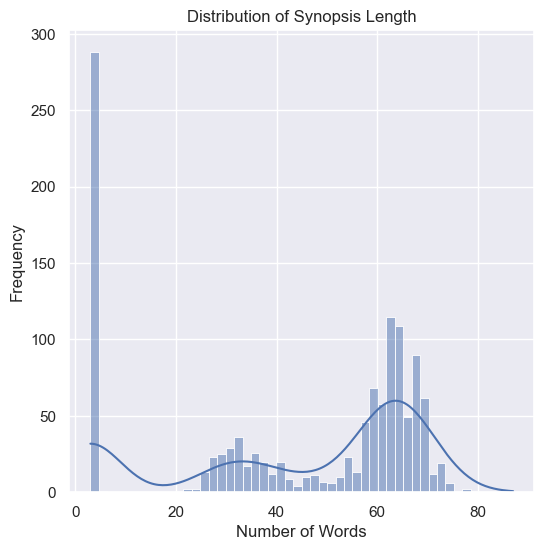

In [9]:
plt.figure(figsize=(6, 6))
sns.histplot(data['synopsis_length'], bins=50, kde=True)
plt.title('Distribution of Synopsis Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


**Analysis** : Shorter synopses seem more common. The highest frequency is concentrated at the lower end of the word count axis (near zero), as shown by the tall bar.

b. Word Cloud for themes in Synopses

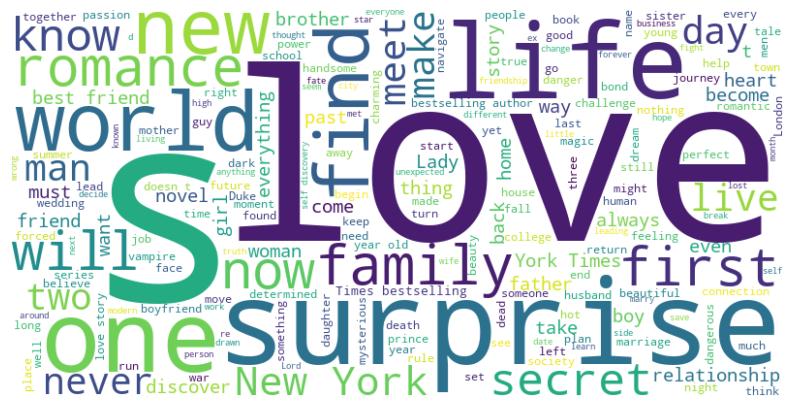

In [10]:
from wordcloud import WordCloud

text = ' '.join(data['synopsis'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


 **Analysis** :

1. **Most Frequent Words:**
     - "Love"
     - "Life," "Surprise," "Family," "Find," "One," "New," "Secret," "Know,"** 

2. **Recurring Themes or Genres:**
     - Romance:  "love," "relationship," "romance," "marriage," "together," "heart."
     - Family and Personal Life:  "family," "father," "daughter," "mother," "life."
     - Mystery/Discovery: "secret," "find," "discover," "past," "truth."
     - Adventure/Change:  "journey," "world," "new," "become," "future."
     - Drama:  "never," "want," "know," "make," "will."



## [5] Text preprocessing

a. Removing Stop Words and Punctuation

In [11]:
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_synopsis(text):
    if pd.isnull(text):
        return ''
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_synopsis'] = data['synopsis'].apply(clean_synopsis)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


b. Sentiment Analysis on Synopses

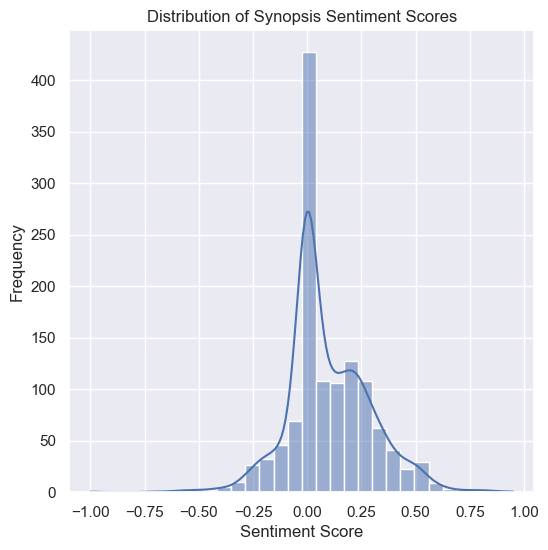

In [12]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

data['synopsis_sentiment'] = data['cleaned_synopsis'].apply(get_sentiment)

plt.figure(figsize=(6, 6))
sns.histplot(data['synopsis_sentiment'], bins=30, kde=True)
plt.title('Distribution of Synopsis Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


**Analysis** : 
- many books with neutral / mildly positive content
- data looks slightly skewed towards right
       

c. Topic Modeling (Latent Dirichlet Allocation - LDA)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
synopsis_matrix = vectorizer.fit_transform(data['cleaned_synopsis'].dropna())

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(synopsis_matrix)

for i, topic in enumerate(lda.components_):
    words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {', '.join(words)}")


Topic 1: dangerous, dark, make, man, vampire, life, night, shes, love, world
Topic 2: romance, way, day, story, years, boy, family, town, life, love
Topic 3: mysterious, personal, bond, emotional, life, relationship, romance, story, love, surprise
Topic 4: friend, woman, best, times, author, bestselling, life, york, love, new
Topic 5: year, lady, hes, high, family, world, school, life, romance, love


In [14]:
synopsis_matrix = vectorizer.transform(data['cleaned_synopsis'].dropna())
topic_distribution = lda.transform(synopsis_matrix)
dominant_topic = np.argmax(topic_distribution, axis=1)

data = data.reset_index(drop=True)  
data['topic'] = dominant_topic


print(data[['cleaned_synopsis', 'topic']].head())


                                    cleaned_synopsis  topic
0  elizabeth bennet independent witty young woman...      3
1  hazel grace lancaster cancer patient finds lif...      3
2  alex claremontdiaz first son united states pri...      4
3  three things absolutely positivefirst edward v...      1
4  nemesis n 1 opponent rival person cannot best ...      4


## [6] Correlation ( Pearson and Spearman)

a. Sentiment vs. Ratings Correlation

In [15]:
data.head()

,slno,title,author,synopsis,rating,number of ratings,synopsis_length,cleaned_synopsis,synopsis_sentiment,topic
0,1,Pride and Prejudice (Paperback),Jane Austen,"Elizabeth Bennet, an independent and witty you...",4.28,3732237,40,elizabeth bennet independent witty young woman...,0.322222,3
1,2,The Fault in Our Stars (Hardcover),John Green,"Hazel Grace Lancaster, a cancer patient, finds...",4.16,4501032,46,hazel grace lancaster cancer patient finds lif...,0.500000,3
2,3,"Red, White & Royal Blue (Paperback)",Casey McQuiston,"When Alex Claremont-Diaz, the First Son of the...",4.16,607767,41,alex claremontdiaz first son united states pri...,-0.043750,4
3,4,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,About three things I was absolutely positive.F...,3.63,5901197,51,three things absolutely positivefirst edward v...,0.240000,1
4,5,The Hating Game (Paperback),Sally Thorne,Nemesis (n.) 1) An opponent or rival whom a pe...,3.98,537504,57,nemesis n 1 opponent rival person cannot best ...,-0.200000,4


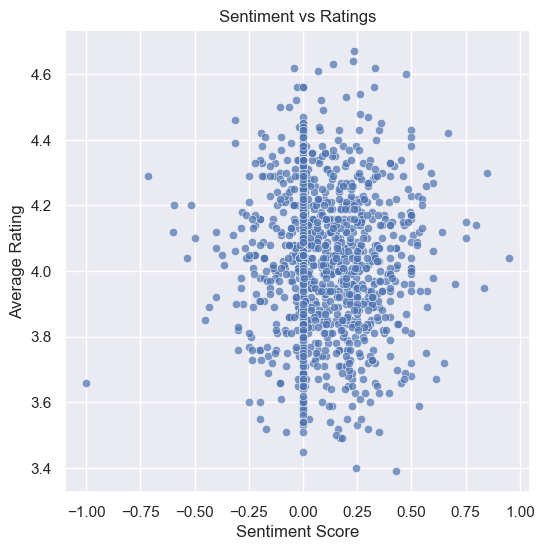

Pearson Correlation: -0.02
Spearman Correlation: -0.05


In [16]:
from scipy.stats import pearsonr, spearmanr

plt.figure(figsize=(6, 6))
sns.scatterplot(x=data['synopsis_sentiment'], y=data['rating'], alpha=0.7)
plt.title('Sentiment vs Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Average Rating')
plt.show()

pearson_corr, _ = pearsonr(data['synopsis_sentiment'], data['rating'])
spearman_corr, _ = spearmanr(data['synopsis_sentiment'], data['rating'])
print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")

**Analysis** : The low correlations indicates that  sentiment does not strongly influence ratings or popularity.

b. Sentiment vs. Popularity Correlation


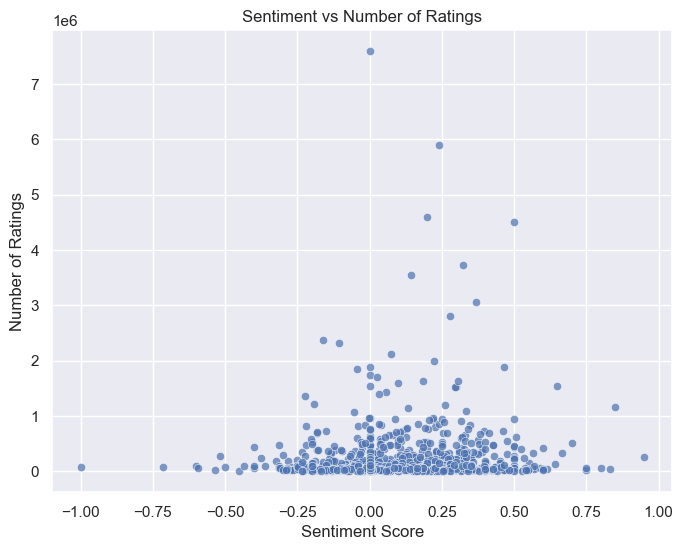

Pearson Correlation: 0.09
Spearman Correlation: 0.14


In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['synopsis_sentiment'], y=data["number of ratings"], alpha=0.7)
plt.title('Sentiment vs Number of Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Ratings')
plt.show()

pearson_corr, _ = pearsonr(data['synopsis_sentiment'], data["number of ratings"])
spearman_corr, _ = spearmanr(data['synopsis_sentiment'], data["number of ratings"])
print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")

**Analysis** : the positive correlation with popularity suggests slightly more popular books might align with positive/neutral sentiments.

 c. Popularity vs. Ratings

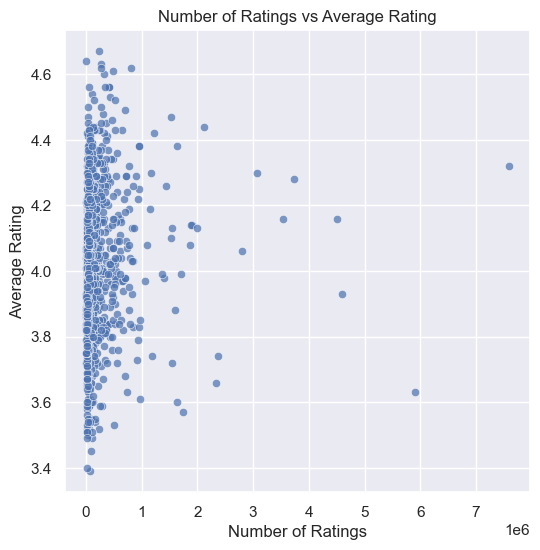

Pearson Correlation: 0.06
Spearman Correlation: 0.16


In [18]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=data["number of ratings"], y=data['rating'], alpha=0.7)
plt.title('Number of Ratings vs Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

pearson_corr, _ = pearsonr(data["number of ratings"], data['rating'])
spearman_corr, _ = spearmanr(data["number of ratings"], data['rating'])
print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")


**Analysis** : The weak positive correlation shows that higher ratings don't always mean more ratings, but there’s some alignment.

## [7] Topic Analysis

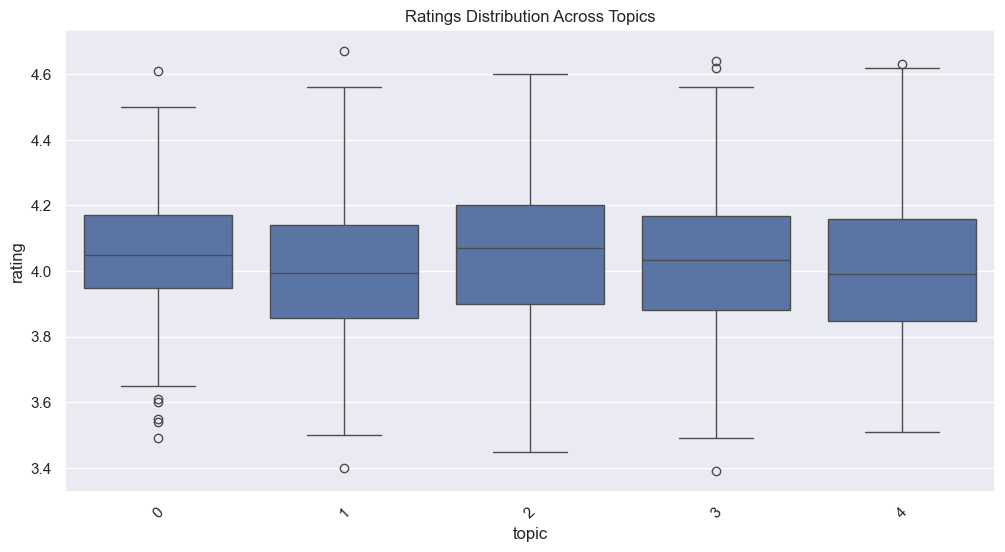

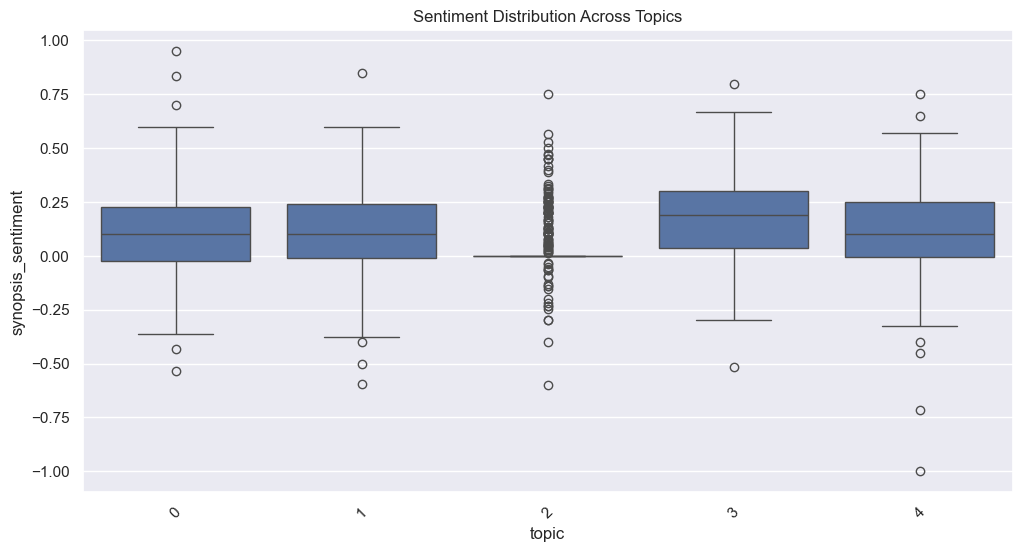

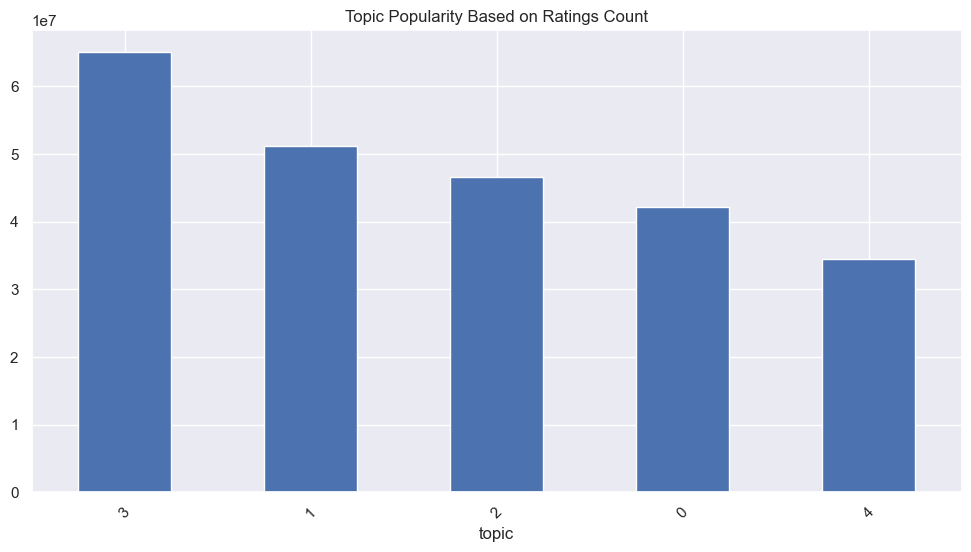

In [19]:
# ratings and popularity distribution per topic
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='topic', y='rating')
plt.title('Ratings Distribution Across Topics')
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis 
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='topic', y="synopsis_sentiment")
plt.title('Sentiment Distribution Across Topics')
plt.xticks(rotation=45)
plt.show()

# Topic Popularity
topic_popularity = data.groupby('topic')['number of ratings'].sum().sort_values(ascending=False)
topic_popularity.plot(kind='bar', figsize=(12, 6), title='Topic Popularity Based on Ratings Count')
plt.xticks(rotation=45)
plt.show()


**Analysis** 
- topic that is most highly rated= 2
- Topic with extreme sentiment scores = 2
- Popular topic based on the number of ratings = 3

## [8] clustering to find relationships between sentiment, ratings, and popularity

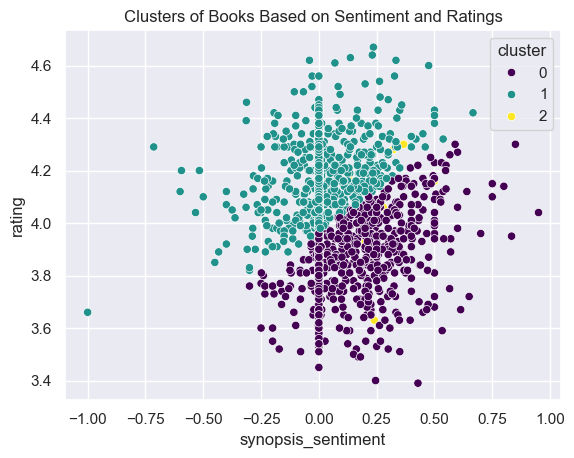

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features
features = data[['rating', 'synopsis_sentiment', 'number of ratings']].fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(data=data, x='synopsis_sentiment', y='rating', hue='cluster', palette='viridis')
plt.title('Clusters of Books Based on Sentiment and Ratings')
plt.show()


## Integrated Recommendation System : LDA + KMeans Clustering

Top Books Display (LDA-Based Theme Ranking)

In [21]:
# Ranking books within each LDA theme by rating
data['theme_rank'] = data.groupby('topic')['rating'].rank(method='first', ascending=False)

def get_top_books_by_theme(rank):
    top_books_by_theme = data[data['theme_rank'] == rank]
    return top_books_by_theme[['title', 'author', 'rating', 'number of ratings', 'topic','synopsis_sentiment']]

# refresh 
page_refresh_count = 2 # Incrementing this with each refresh
top_books_for_page = get_top_books_by_theme(page_refresh_count)

print("Top Books by Theme for Display:")
print(top_books_for_page)

# User-selects a book
selected_books = top_books_for_page.sample(n=3) 
print("\nUser Selected Books:")
print(selected_books)


Top Books by Theme for Display:
                                                  title            author  \
37    A Court of Mist and Fury (A Court of Thorns an...     Sarah J. Maas   
297              Empire of Storms (Throne of Glass, #5)     Sarah J. Maas   
517                Kingdom of Ash (Throne of Glass, #7)     Sarah J. Maas   
842                        Wildfire (Hidden Legacy, #3)     Ilona Andrews   
1052                         Acheron (Dark-Hunter, #14)  Sherrilyn Kenyon   

      rating  number of ratings  topic  synopsis_sentiment  
37      4.62             816759      3           -0.040727  
297     4.56             343879      1           -0.029167  
517     4.62             261600      4            0.333333  
842     4.50              34237      0           -0.106250  
1052    4.56              58019      2            0.000000  

User Selected Books:
                                       title            author  rating  \
297   Empire of Storms (Throne of Glass, #5

 User Preferences Sent to Clustering

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extracting sentiment and rating from selected books
user_selected_data = selected_books[['rating', 'synopsis_sentiment']].copy()

# Normalizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['rating', 'synopsis_sentiment']])

# Performing KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Analyzing Cluster Centroids
print("\nCluster Centers (Rating & Sentiment):")
print(kmeans.cluster_centers_)

# Maping selected books to clusters
selected_books['cluster'] = kmeans.predict(scaler.transform(user_selected_data))
print("\nUser Selected Books with Cluster Mapping:")
print(selected_books[['title', 'rating', 'synopsis_sentiment', 'cluster']])



Cluster Centers (Rating & Sentiment):
[[-1.00408595 -0.34294549]
 [ 0.07365592  1.18729782]
 [ 0.75215155 -0.5496283 ]]

User Selected Books with Cluster Mapping:
                                       title  rating  synopsis_sentiment  \
297   Empire of Storms (Throne of Glass, #5)    4.56           -0.029167   
1052              Acheron (Dark-Hunter, #14)    4.56            0.000000   
842             Wildfire (Hidden Legacy, #3)    4.50           -0.106250   

      cluster  
297         2  
1052        2  
842         2  


Personalized Recommendation Based on Cluster & Weighting

In [23]:
user_sentiment_weight = 0.7  # Sentiment weight
user_rating_weight = 0.3  # Rating weight

selected_clusters = selected_books['cluster'].unique()
recommended_books = data[data['cluster'].isin(selected_clusters)].copy()

# Normalizing sentiment and rating
recommended_books['norm_rating'] = (recommended_books['rating'] - recommended_books['rating'].min()) / (recommended_books['rating'].max() - recommended_books['rating'].min())
recommended_books['norm_sentiment'] = (recommended_books['synopsis_sentiment'] - recommended_books['synopsis_sentiment'].min()) / (recommended_books['synopsis_sentiment'].max() - recommended_books['synopsis_sentiment'].min())

# Calculating final score based on user weights
recommended_books['final_score'] = (
    user_rating_weight * recommended_books['norm_rating'] +
    user_sentiment_weight * recommended_books['norm_sentiment']
)

# Top Recommendations
final_recommendations = recommended_books.sort_values(by='final_score', ascending=False).head(5)
print("\nFinal Recommended Books for the User:")
print(final_recommendations[['title', 'author', 'final_score', 'cluster']])



Final Recommended Books for the User:
                                               title          author  \
517             Kingdom of Ash (Throne of Glass, #7)   Sarah J. Maas   
149     Heartstopper: Volume Four (Heartstopper, #4)    Alice Oseman   
845          It Starts with Us (It Ends with Us, #2)  Colleen Hoover   
772  Written in My Own Heart's Blood (Outlander, #8)  Diana Gabaldon   
234     House of Earth and Blood (Crescent City, #1)   Sarah J. Maas   

     final_score  cluster  
517     0.978261        2  
149     0.934773        2  
845     0.918620        2  
772     0.896149        2  
234     0.871732        2  


In [1]:
import pickle
with open('ml_model.pkl', 'wb') as model_file:
    pickle.dump({
        'scaler': scaler,
        'kmeans': kmeans,
        'data': data,
        'recommended_books': recommended_books
    }, model_file)

NameError: name 'scaler' is not defined

**Analysis** : This method was great but the recommendations were not that accurate 

## Recommender System Using LDA + Cosine Similarity

Top Books Display (LDA-Based Theme Ranking)

In [ ]:
data['theme_rank'] = data.groupby('topic')['rating'].rank(method='first', ascending=False)

def get_top_books_by_theme(rank):
    top_books_by_theme = data[data['theme_rank'] == rank]
    return top_books_by_theme[['title', 'author', 'rating', 'number of ratings', 'topic','synopsis_sentiment']]

# refresh 
page_refresh_count = 2 # Incrementing this with each refresh
top_books_for_page = get_top_books_by_theme(page_refresh_count)

print("Top Books by Theme for Display:")
print(top_books_for_page)

# User-selects a book
selected_books = top_books_for_page.sample(n=3) 
print("\nUser Selected Books:")
print(selected_books)


Using Cosine Similarity for recommendations

In [ ]:
def recommend_books_cosine_similarity(selected_books, data, refresh_count):
    """
    Args:
        selected_books (DataFrame): User-selected books.
        data (DataFrame): Full dataset of books.
        refresh_count (int): Current refresh count.
    Return:
        DataFrame: Recommended book.
    """
    data['combined_features'] = data.apply(
        lambda row: f"{row['synopsis']} {row['rating']} {row['synopsis_sentiment']}", axis=1
    )
    selected_books['combined_features'] = selected_books.apply(
        lambda row: f"{row['synopsis']} {row['rating']} {row['synopsis_sentiment']}", axis=1
    )
    
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(data['combined_features'])
    selected_matrix = tfidf.transform(selected_books['combined_features'])
    
    cosine_sim = cosine_similarity(selected_matrix, tfidf_matrix)
    avg_similarity = cosine_sim.mean(axis=0)
    
    data['similarity_score'] = avg_similarity
    
    recommended_books = data[~data['title'].isin(selected_books['title'])].copy()
    recommended_books = recommended_books.sort_values(by='similarity_score', ascending=False)
    
    if refresh_count <= len(recommended_books):
        return recommended_books.iloc[refresh_count - 1][['title', 'author', 'rating', 'topic', 'synopsis']]
    else:
        return None 

recommended_book = recommend_books_cosine_similarity(selected_books, data, page_refresh_count)
if recommended_book is not None:
    print("\nRecommended Book Based on User Preferences:")
    print(recommended_book)
else:
    print("\nNo more recommendations available. Try adjusting your selection or refresh count.")


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_features'])

with open('mmodel.pkl', 'wb') as model_file:
    pickle.dump({'data': data, 'tfidf_vectorizer': tfidf_vectorizer, 'tfidf_matrix': tfidf_matrix}, model_file)
